# Gender Classification

## Data import

First of all we are going to read all audio files inside the folders and extract their mel frequency cepstral coefficients (mfcc) features.

In [1]:
import numpy as np
import librosa.display
import os
import csv
import pandas as pd

c:\python37\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
c:\python37\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


Now, a csv file will be created to store all mfcc featres which will be extracted later. This file contains the name of audio file, speaker_id corresponding to name of the folder which contains the audio files of an individual speaker (later we will assign gender based on this speaker_id) and 20 extracted mfcc features of the audio. We’ll get 20 mfcc for given sampling rate because it is calculated for each frame so mfcc has 20 columns.

In [2]:
header = 'filename speaker_id'
for i in range(1, 21):  
    header += f' mfcc{i}'
header = header.split()
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

The following cell reads each audio file inside the folders, extract its mfcc features and write it to the csv file.

In [3]:
speakers_id = os.listdir(f'F:/ML/Challenge/voiseed/codes/LibriSpeech/dev-clean')  #get folder names inside dev-clean as list 
for speaker_id in speakers_id:
    speaker_id_folders = os.listdir(f'F:/ML/Challenge/voiseed/codes/LibriSpeech/dev-clean/{speaker_id}')
    for speaker_id_folder in speaker_id_folders:
        audios = os.listdir(f'F:/ML/Challenge/voiseed/codes/LibriSpeech/dev-clean/{speaker_id}/{speaker_id_folder}')
        for audio in audios[:-1]:  # select all elements in audio list except the last one to exlude the txt files inside folders 
            y, sr = librosa.load(f'F:/ML/Challenge/voiseed/codes/LibriSpeech/dev-clean/{speaker_id}/{speaker_id_folder}/{audio}')
            mfcc = librosa.feature.mfcc(y=y, sr=sr)  # getting mfcc feature of voice
            to_append = f'{audio}, {speaker_id}'
            for e in mfcc:
                to_append += f' {np.mean(e)}'
            file = open('data.csv', 'a', newline='')
            with file:
                writer = csv.writer(file)
                writer.writerow(to_append.split())

Now we are going to merge above csv file with SPEAKERS.TXT file which contain SEX of each speaker. These two files are merged base on their speaker ID.

In [4]:
df1 = pd.read_csv('data.csv')
df2 = pd.read_csv(f'F:/ML/Challenge/voiseed/codes/LibriSpeech/mySPEAKERS.TXT', sep="|")
df3 = df1.set_index('speaker_id').join(df2.set_index('ID  '))
df3.to_csv('result.csv',sep=",", index=True, index_label='speaker_id')

Now we have result.csv file with complete information. This file contains 2703 audio files among which there are 1374 Female speakers and 1329 Male speakers.Our dataset is well balanced (not skewed dataset).

(2703, 26)
SEX
 F     1374
 M     1329
dtype: int64


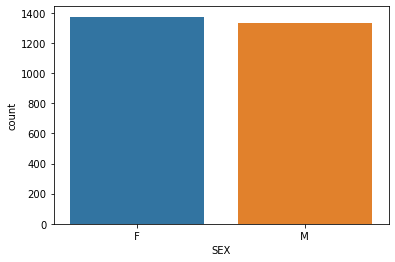

In [5]:
data = pd.read_csv('result.csv') #reading csv file in dataframe
data.head()

import matplotlib.pyplot as plt
print(data.shape)
print(data.groupby('SEX').size())
import seaborn as sns
sns.countplot(data['SEX'],label="Count")
plt.show()


## Data preparation

So far, we have obtained result.scv file with complete information needed for classification. But this file still needs some preprocessing to be be used in classification algorithms. Next cell, shows the needed preprocessing by dropping 'speaker_id', 'filename', 'SUBSET', 'MINUTES' and 'NAME' columns which are not useful in our analysis.

In [6]:
# Dropping unneccesary columns
# print(data.columns)
data = data.drop(columns = ['speaker_id', 'filename', ' SUBSET           ', 'MINUTES', ' NAME']) 
data.head()

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,SEX
0,-419.847351,73.313690,-2.799128,20.824003,-1.656886,1.774456,-9.823409,-11.981690,-0.670510,-0.307097,...,3.649490,0.185564,-4.233615,-3.307079,-6.093760,-0.632954,-1.502177,-0.305216,-2.860774,F
1,-322.999725,119.151482,-9.159356,42.007870,-6.560522,11.799162,-22.448534,-18.841612,-1.997425,1.015336,...,-0.564598,2.643572,-6.246498,-7.345601,-11.384090,-3.411965,-9.938647,0.463774,-9.668585,F
2,-319.020020,119.203087,-7.511576,41.635128,-15.609816,20.621065,-15.774974,-18.124613,-7.410688,0.428711,...,-2.794448,2.909257,-0.471930,-3.932545,-11.653850,-0.297595,-11.500805,-3.893440,-5.812822,F
3,-353.989960,105.486794,-12.826978,39.885773,-10.034200,17.768614,-16.275583,-9.991673,-2.916053,4.353817,...,-0.189973,3.594027,-3.095109,-2.149326,-9.738606,1.961927,-8.505114,0.182180,-6.436677,F
4,-337.997589,121.337364,-16.668852,42.498047,-11.941293,12.938862,-14.015354,-16.911777,-6.433099,0.231811,...,-1.609548,4.712039,-4.152081,-10.096634,-11.537382,-0.028493,-12.335622,-2.322398,-7.473925,F


### One-hot encoding

Above table shows that the labels ('SEX') are categorical, then we need to encode them to integers ( 0 and 1) to be readable by algorithms.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
X = np.array(data.iloc[:, :-1], dtype = float) #select all the columns except the last one which is labels (y) as our input X
# One-hot encoding
gender_list = data.iloc[:, -1] #select the last column which is labels as our output y
encoder = LabelEncoder()       
y = encoder.fit_transform(gender_list) # Converting categorical labels to integer (0 and 1)

In [8]:
#gives information about the data types,columns, null value counts, memory usage etc
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2703 entries, 0 to 2702
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mfcc1   2703 non-null   float64
 1   mfcc2   2703 non-null   float64
 2   mfcc3   2703 non-null   float64
 3   mfcc4   2703 non-null   float64
 4   mfcc5   2703 non-null   float64
 5   mfcc6   2703 non-null   float64
 6   mfcc7   2703 non-null   float64
 7   mfcc8   2703 non-null   float64
 8   mfcc9   2703 non-null   float64
 9   mfcc10  2703 non-null   float64
 10  mfcc11  2703 non-null   float64
 11  mfcc12  2703 non-null   float64
 12  mfcc13  2703 non-null   float64
 13  mfcc14  2703 non-null   float64
 14  mfcc15  2703 non-null   float64
 15  mfcc16  2703 non-null   float64
 16  mfcc17  2703 non-null   float64
 17  mfcc18  2703 non-null   float64
 18  mfcc19  2703 non-null   float64
 19  mfcc20  2703 non-null   float64
 20  SEX     2703 non-null   object 
dtypes: float64(20), object(1)
memory usag

In [9]:
#basic statistic details about the data
data.describe(include="all")

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,SEX
count,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,...,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703.000000,2703
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1374
mean,-351.360571,112.805266,-19.905308,36.549339,-9.511490,7.169056,-12.037084,-2.761072,-8.120058,-0.106473,...,-4.979388,2.971189,-4.881867,2.419540,-5.929809,1.105413,-4.789277,-1.978984,-2.500270,NaN
std,48.669906,18.110236,21.022976,14.543474,10.423086,15.385830,10.063145,10.013808,7.215786,5.565037,...,5.310914,4.018163,4.764392,5.546150,4.709333,5.166220,4.013830,4.340635,3.389517,NaN
min,-580.348938,54.802864,-103.232010,-18.738472,-41.767353,-40.609489,-40.527187,-32.984631,-32.176800,-16.970016,...,-23.851866,-8.948812,-21.250368,-15.846490,-22.854746,-14.142464,-17.188225,-17.228401,-15.868935,NaN
25%,-377.101486,100.171955,-29.843185,26.559378,-16.340528,-2.808908,-18.819548,-9.347536,-12.900718,-3.689845,...,-8.026538,0.153035,-7.936918,-1.632201,-9.161136,-2.551487,-7.712995,-4.548556,-4.467237,NaN
50%,-347.360657,112.806412,-17.453375,37.113907,-9.499866,8.838675,-11.230647,-2.758599,-7.897206,-0.342151,...,-4.814351,2.884267,-4.542341,2.088176,-5.869360,1.045814,-4.827066,-1.786131,-2.371480,NaN
75%,-322.158096,124.531002,-5.409813,46.408264,-2.467551,17.827068,-5.022178,3.258539,-2.676023,3.416739,...,-1.204289,5.897564,-1.611833,6.696843,-2.867090,4.397955,-1.853306,0.637665,-0.302375,NaN


### Separate Train/Test sets

Then, we split data into training and test test (75% of total data are considered for training and 0.25% for testing). Training dataset to train the model and test dataset to evaluate it. So we will have 2027 data for training and 676 for testing.

In [10]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,  random_state=42, shuffle=True)
print(X_train.shape)
print(X_test.shape)

(2027, 20)
(676, 20)


### Data scaling

Data normalization or scaling is very important for most of techniques to work well. Next cell is about data scaling.

In [12]:
# Data scaling (normalization)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

So far, we have done data cleaning and preprocessing and have created our training and test data sets. Now, it is time to train different classifiers. We first start with Naive Bayes tecnique which is simpler. As in every machine learning or deep learning works, first model is fitted with training dataset and then it is used to predict unseen data (i.e. test dataset for evaluation or any new data for prediction)  

## Naive Bayes Model

In [13]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

There are many measures to evaluate the trained model such as accuracy, precission, recall, error, etc. In this work, I decided to show all.

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#EVALUATE THE MODEL ON TRAINING SET
print('***RESULTS ON TRAINING SET***')
print('Accuracy of Naive Bayes classifier on training set: {:.2f}'
     .format(nb.score(X_train, y_train)))

#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
print('***RESULTS ON TEST SET***')
print(classification_report(y_test, y_pred))
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'
      .format(nb.score(X_test, y_test)))

***RESULTS ON TRAINING SET***
Accuracy of Naive Bayes classifier on training set: 0.84
***RESULTS ON TEST SET***
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       328
           1       0.79      0.87      0.83       348

    accuracy                           0.81       676
   macro avg       0.81      0.81      0.81       676
weighted avg       0.81      0.81      0.81       676

Accuracy of Naive Bayes classifier on test set: 0.81


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def confusion_matrix_plot(y_test, y_pred):
    plt.style.use('ggplot')# Plot confusion matrix
    fig =sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);
    fig.set(xlabel='Actual class', ylabel='Predicted class')

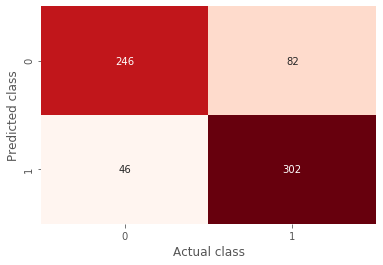

In [16]:
confusion_matrix_plot(y_test, y_pred)

As you can see, accuracy for training and test sets are 84% and 81% repectively. This low accuracy of training set means that model suffers from underfitting (high bias). In other words, the trained model is simple as expected and it is not able to callsify the samples well.By looking at confusion matrix, you can see that 548 samples out of 676 (in test dataset) are classified correctly while 82 of males are classified wrongly as female and 46 females are classified incorrectly as male.

## Logistic Regression Model

In [17]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
#EVALUATE THE MODEL ON TRAINING SET
print('***RESULTS ON TRAINING SET***')
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(lr.score(X_train, y_train)))

#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
print('***RESULTS ON TEST SET***')
print(classification_report(y_test, y_pred))
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
      .format(lr.score(X_test, y_test)))

***RESULTS ON TRAINING SET***
Accuracy of Logistic Regression classifier on training set: 0.91
***RESULTS ON TEST SET***
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       328
           1       0.90      0.90      0.90       348

    accuracy                           0.90       676
   macro avg       0.90      0.90      0.90       676
weighted avg       0.90      0.90      0.90       676

Accuracy of Logistic Regression classifier on test set: 0.90


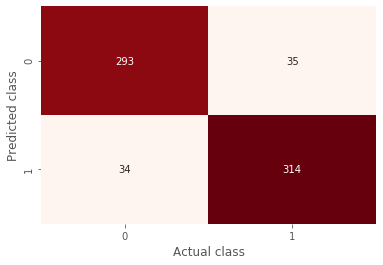

In [19]:
confusion_matrix_plot(y_test, y_pred)

For logistic regression model, accuracy of training and test sets are 91% and 90% respectively. This model is better than naive bayes but still it can be improved.
By looking at confusion matrix, you can see that 607 samples out of 676 (in test dataset) are classified correctly while 35 of males are classified wrongly as female and 34 females are classified incorrectly as male. Indeed, the number of corrected predictions are larger than naive bayes and also the number of incorrected predictions are lower than naive bayes model.

## Decision Tree Model

In [20]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)


#EVALUATE THE MODEL ON TRAINING SET
print('***RESULTS ON TRAINING SET***')
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dt.score(X_train, y_train)))

#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
print('***RESULTS ON TEST SET***')
print(classification_report(y_test, y_pred))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dt.score(X_test, y_test)))

***RESULTS ON TRAINING SET***
Accuracy of Decision Tree classifier on training set: 1.00
***RESULTS ON TEST SET***
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       328
           1       0.93      0.93      0.93       348

    accuracy                           0.93       676
   macro avg       0.93      0.93      0.93       676
weighted avg       0.93      0.93      0.93       676

Accuracy of Decision Tree classifier on test set: 0.93


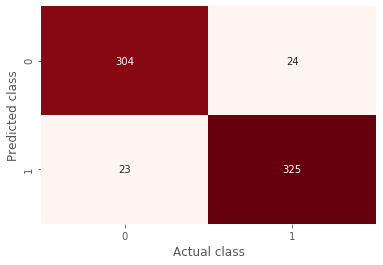

In [21]:
confusion_matrix_plot(y_test, y_pred)

In decision tree, accuracy on test set is 100% which means there is overfitting (high variance) for this model. It worths mentioning that decision tree algorithms are easy to interpret but they easily fall to overfitting. Although we have 93% accuracy on test set which may not be bad, there is gap between two accuracies (100% and 93%). This gap means that the model does not generalize well on unseen and new data. One remedy to decrease overfitting is to use regularization.



## Random Forest Model

In [22]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


#EVALUATE THE MODEL ON TRAINING SET
print('***RESULTS ON TRAINING SET***')
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
print('***RESULTS ON TEST SET***')
print(classification_report(y_test, y_pred))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

***RESULTS ON TRAINING SET***
Accuracy of Random Forest classifier on training set: 1.00
***RESULTS ON TEST SET***
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       328
           1       0.98      0.95      0.96       348

    accuracy                           0.96       676
   macro avg       0.96      0.96      0.96       676
weighted avg       0.96      0.96      0.96       676

Accuracy of Random Forest classifier on test set: 0.96


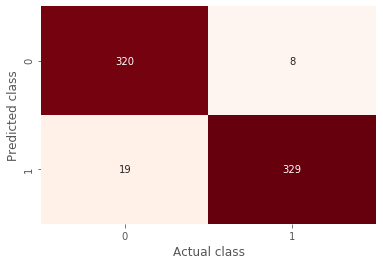

In [23]:
confusion_matrix_plot(y_test, y_pred)

Random forest model is more accurate than decision tree model because it using a forest of decision trees and not suprisingly  has usually better results. As you can see, corrected predictions (diagonal elements) are larger and incorrected predictions (off-diagonal elements) are lower than decision tree model. Notice that random forest like decision tree has overfitting. 

## Linear Support Vector Machine (SVM) Model

In [24]:
# Fitting SVM_linear to the Training set
from sklearn.svm import SVC
SVM_linear = SVC(kernel = 'linear', random_state = 0)
SVM_linear.fit(X_train, y_train)
y_pred = SVM_linear.predict(X_test)


#EVALUATE THE MODEL ON TRAINING SET
print('***RESULTS ON TRAINING SET***')
print('Accuracy of Random SVM_linear on training set: {:.2f}'
     .format(SVM_linear.score(X_train, y_train)))

#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
print('***RESULTS ON TEST SET***')
print(classification_report(y_test, y_pred))
print('Accuracy of Random SVM_linear on test set: {:.2f}'
     .format(SVM_linear.score(X_test, y_test)))

***RESULTS ON TRAINING SET***
Accuracy of Random SVM_linear on training set: 0.91
***RESULTS ON TEST SET***
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       328
           1       0.90      0.89      0.90       348

    accuracy                           0.89       676
   macro avg       0.89      0.90      0.89       676
weighted avg       0.90      0.89      0.89       676

Accuracy of Random SVM_linear on test set: 0.89


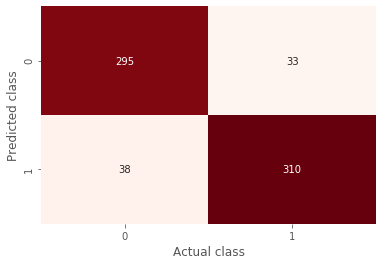

In [25]:
confusion_matrix_plot(y_test, y_pred)

The results of Linear SVM model is very similar to logistic regression as expected. Because linear SVM conceptually is closely linked to logistic regression but logistic regression focuses on maximizing the probability of the data while SVM tries to find the separating hyperplane that maximizes the distance of the closest points to the margin.

## Nonlinear SVM Model

In [26]:
# Fitting SVM_nonlinear to the Training set
from sklearn.svm import SVC
SVM_nonlinear = SVC(kernel = 'rbf', random_state = 0)
SVM_nonlinear.fit(X_train, y_train)
y_pred = SVM_nonlinear.predict(X_test)


#EVALUATE THE MODEL ON TRAINING SET
print('***RESULTS ON TRAINING SET***')
print('Accuracy of Random SVM_nonlinear on training set: {:.2f}'
     .format(SVM_nonlinear.score(X_train, y_train)))

#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
print('***RESULTS ON TEST SET***')
print(classification_report(y_test, y_pred))
print('Accuracy of Random SVM_nonlinear on test set: {:.2f}'
     .format(SVM_nonlinear.score(X_test, y_test)))

***RESULTS ON TRAINING SET***
Accuracy of Random SVM_nonlinear on training set: 1.00
***RESULTS ON TEST SET***
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       328
           1       0.99      1.00      1.00       348

    accuracy                           1.00       676
   macro avg       1.00      1.00      1.00       676
weighted avg       1.00      1.00      1.00       676

Accuracy of Random SVM_nonlinear on test set: 1.00


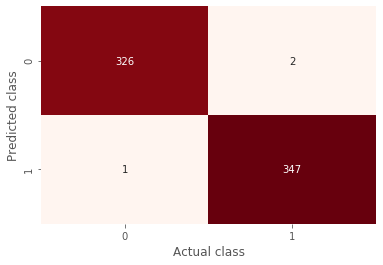

In [27]:
confusion_matrix_plot(y_test, y_pred)

Generally, SVM using nonlinear kernel has better results than linear kernel when data are not linearly dependent. So as expected here, nonlinear kernel has a better performance. One can see that only 3 samples are predicted incorectedly.

## K-Nearest Neighbor (KNN) Model

In [28]:
# Fitting K-NN (K - Nearest Neighbor) to the Training set
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


#EVALUATE THE MODEL ON TRAINING SET
print('***RESULTS ON TRAINING SET***')
print('Accuracy of KNN on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
print('***RESULTS ON TEST SET***')
print(classification_report(y_test, y_pred))
print('Accuracy of KNN on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

***RESULTS ON TRAINING SET***
Accuracy of KNN on training set: 1.00
***RESULTS ON TEST SET***
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       328
           1       1.00      0.99      1.00       348

    accuracy                           1.00       676
   macro avg       1.00      1.00      1.00       676
weighted avg       1.00      1.00      1.00       676

Accuracy of KNN on test set: 1.00


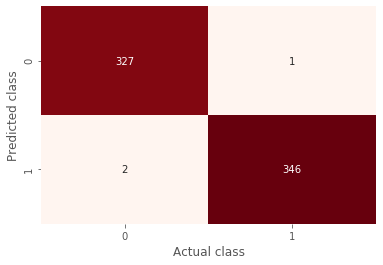

In [29]:
confusion_matrix_plot(y_test, y_pred)

## Neural Network (NN) Model

In [30]:
# Fitting Neural Network to the Training set
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)


#EVALUATE THE MODEL ON TRAINING SET
print('***RESULTS ON TRAINING SET***')
print('Accuracy of Neural Network on training set: {:.2f}'
     .format(nn.score(X_train, y_train)))

#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
print('***RESULTS ON TEST SET***')
print(classification_report(y_test, y_pred))
print('Accuracy of Neural Network on test set: {:.2f}'
     .format(nn.score(X_test, y_test)))

***RESULTS ON TRAINING SET***
Accuracy of Neural Network on training set: 1.00
***RESULTS ON TEST SET***
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       328
           1       0.99      0.99      0.99       348

    accuracy                           0.99       676
   macro avg       0.99      0.99      0.99       676
weighted avg       0.99      0.99      0.99       676

Accuracy of Neural Network on test set: 0.99


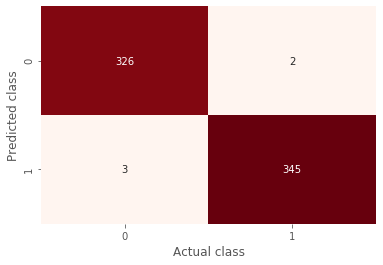

In [31]:
confusion_matrix_plot(y_test, y_pred)

All three NN, KNN and nonlinear SVM have accuracy of 100% and they are very well generalized to new data.
They are only slightly diferrence in precision and recall. One can choose one of these tecniques based on his/her need of having better precision or recall i.e. if it is important to better predict male speakers or female speakers.

Moreover, NN performance which is very close to nonlinear SVM but different from linear SVM, also proves that there is nonlinear correlation between data (since NN is good to capture nonlinearity).

## Deep Neural Network (DNN) Model

Now, we are going to design Deep Neural Network (DNN) model. This model is composed of 4 dense layers each one has different number of units as follows.

In [45]:
# Building Deep Neural Network architecture 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

dnn = Sequential()
dnn.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
# dnn.add(Dropout(0.5))
dnn.add(Dense(128, activation='relu'))
# dnn.add(Dropout(0.5))
dnn.add(Dense(64, activation='relu'))
# dnn.add(Dropout(0.5))
dnn.add(Dense(1, activation='sigmoid'))

dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dnn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 256)               5376      
_________________________________________________________________
dense_25 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_26 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 65        
Total params: 46,593
Trainable params: 46,593
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Fitting Deep Neural Network to the Training set
history = dnn.fit(X_train, y_train, epochs=10, batch_size=128)
train_loss, train_acc = dnn.evaluate(X_train,y_train)
test_loss, test_acc = dnn.evaluate(X_test,y_test)
print('train_acc: ',train_acc)
print('test_acc: ',test_acc)

y_pred = dnn.predict(X_test)

Epoch 1/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.8426
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9438
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 0.0858 - accuracy: 0.9719
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 0.0475 - accuracy: 0.9867
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 0.0351 - accuracy: 0.9896
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 0.0233 - accuracy: 0.9946
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 0.9975
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 0.0101 - accuracy: 0.9985
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 0.9995
Epoch 10/10
22/22 [==============================] - 0s 861us/step - loss: 0.0169 - accuracy: 0.9941
train_acc:  1.0
t

Performance of deep neural network is similar to single layer neural network, KNN and nonlinear SVM probably because we have used dev-clean corpus which are empty of noises, background voices, environmental sounds, etc. In case of having not clean dataset, deep neural network is expected to have a better performance due to its capabiliuty of capturing different charactrestic of a voice. 

## Test your voice!

Does your voice represent a Male or Felame? Let's try!

In [51]:
import IPython.display as ipd
voice_path ='F:/ML/Challenge/voiseed/codes/myvoice.flac'  #path to location of your voice
ipd.Audio(voice_path) # load your audio file

In [52]:
y_test, sr_test = librosa.load(voice_path)
mfccs_test = librosa.feature.mfcc(y=y_test, sr=sr_test)   #feature extraction of the voice
mfcc_test =[]
for e in mfccs_test:
    mfcc_test.append(np.mean(e)) 
voice_test =pd.DataFrame(mfcc_test)
voice_test =np.array(voice_test.T, dtype = float)
voice_test_rescaled = sc.transform(voice_test.reshape((1, -1)))

In [53]:
def test_voice(voice, classifier, classifier_name):
    if np.round_(classifier.predict(voice))== 1:
        print(classifier_name + ": " + "It is voice of a Male")
    else:
        print(classifier_name + ": " + "It is voice of a Female")       

In [54]:
classifiers =[nb, lr, dt, rf, SVM_linear, SVM_nonlinear, knn, nn, dnn]  #classifiers include Naive Bayes, Logistic Regression, Decision Tree, Random Forest   #SVM_linear, SVM_nonlinear, K-Neigherst Neighbor, Neural Network, RNN                                                                                    
classifier_names =['nb', 'lr', 'dt', 'rf', 'SVM_linear', 'SVM_nonlinear', 'knn', 'nn', 'dnn']
idx = 0
for cl in classifiers:
    test_voice(voice_test_rescaled, cl, classifier_names[idx])
    idx += 1

nb: It is voice of a Male
lr: It is voice of a Male
dt: It is voice of a Male
rf: It is voice of a Male
SVM_linear: It is voice of a Male
SVM_nonlinear: It is voice of a Male
knn: It is voice of a Male
nn: It is voice of a Male
dnn: It is voice of a Male
